In [1]:
import mylib
import numpy as np
from matplotlib import pyplot as plt

$$\text{if}\quad\rho(I-A)<1$$
$$A^{-1}=\sum_{k=0}^{\infty}(I-A)^k$$
Preconditioned version
$$A^{-1}\mathbb{A}=(\mathbb{A}^{-1}A)^{-1}=\sum_{k=0}^{\infty}(I-\mathbb{A}^{-1}A)^k$$
$$A^{-1}\simeq\mathbb{A}^{-1}\qquad\text{1 order}$$
$$A^{-1}\simeq2\mathbb{A}^{-1} - \mathbb{A}^{-1}A\mathbb{A}^{-1}\qquad\text{2 order}$$
$$A^{-1}\simeq3\mathbb{A}^{-1} - 3\mathbb{A}^{-1}A\mathbb{A}^{-1} + \mathbb{A}^{-2}A^2\mathbb{A}^{-1}\qquad\text{3 order}$$

spectral radius 0.8008052868665116
condition number 3.0923014515641447
det 1.5866263073270386e-52


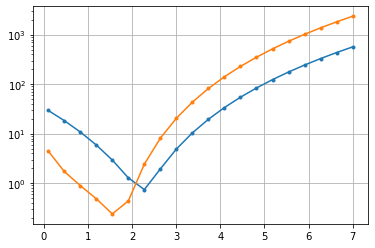

In [3]:
size = 100
A = 0.3*np.eye(size) + 0.01*np.random.rand(size,size)
print("spectral radius", np.max(np.abs(np.linalg.eigvals(A))))
print("condition number", np.linalg.cond(A))
print("det", np.linalg.det(A))

b = np.random.rand(size)
x = np.linalg.solve(A,b)
invA = np.linalg.inv(A)

error = []
errA = []
eps = np.linspace(0.1, 7.0, 20)
for val in eps:
    appoximateInvA = mylib.approxInverseEpsilon(A, 3, val)    
    errA.append(np.linalg.norm(invA-appoximateInvA))
    #xx = mylib.solveApproxInv(A, b, np.zeros(size), nit=10, N=10, epsilon=eps)
    xx = np.dot(appoximateInvA,b)
    error.append(np.linalg.norm(b-np.dot(A,xx)))

plt.semilogy(eps, errA, '.-')
plt.semilogy(eps, error, '.-')
plt.grid()